In [ ]:
! unzip '/content/MAC_derand_lecture-dataset.zip'

Archive:  /content/MAC_derand_lecture-dataset.zip
   creating: lecture-dataset/
  inflating: __MACOSX/._lecture-dataset  
  inflating: lecture-dataset/S21Ultra-M_a.csv  
  inflating: __MACOSX/lecture-dataset/._S21Ultra-M_a.csv  
  inflating: lecture-dataset/iPhoneXR-U.csv  
  inflating: __MACOSX/lecture-dataset/._iPhoneXR-U.csv  
  inflating: lecture-dataset/iPhone11-C_a.csv  
  inflating: __MACOSX/lecture-dataset/._iPhone11-C_a.csv  
  inflating: lecture-dataset/SamsungJ6_K.csv  
  inflating: __MACOSX/lecture-dataset/._SamsungJ6_K.csv  
  inflating: lecture-dataset/iPhone12_W.csv  
  inflating: __MACOSX/lecture-dataset/._iPhone12_W.csv  
  inflating: lecture-dataset/HuaweiHonor9_R.csv  
  inflating: __MACOSX/lecture-dataset/._HuaweiHonor9_R.csv  
  inflating: lecture-dataset/iPhone6_N.csv  
  inflating: __MACOSX/lecture-dataset/._iPhone6_N.csv  


In [ ]:
import pandas as pd
import os

base_dir = '/content/lecture-dataset/'

df_list = list()

#this loop will add all csv files into a single dataframe
for root, dirs, files in os.walk(base_dir):
  for file in files:
    if file.endswith(".csv"):
      file_path = os.path.join(root,file)

      df = pd.read_csv(file_path)
      df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

df['Timestamp']=pd.to_datetime(df['Timestamp'], unit='s')

df = df[df['SSID'].isna()]

df.head()



,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,2021-07-08 08:07:27.307995136,7a:e3:17:f9:50:df,1,1.0,21001fff00000000000000000000000000000000000000...,8001.0,001018020000000000,NaN,02040b16,0c1218243048606c,NaN,NaN,121,SamsungJ6_K
1,2021-07-08 08:07:27.308015104,7a:e3:17:f9:50:df,11,1.0,21001fff00000000000000000000000000000000000000...,8001.0,001018020000000000,NaN,02040b16,0c1218243048606c,NaN,NaN,121,SamsungJ6_K
2,2021-07-08 08:07:27.318708992,7a:e3:17:f9:50:df,11,1.0,21001fff00000000000000000000000000000000000000...,8001.0,001018020000000000,NaN,02040b16,0c1218243048606c,NaN,NaN,121,SamsungJ6_K
3,2021-07-08 08:07:27.318726144,7a:e3:17:f9:50:df,1,1.0,21001fff00000000000000000000000000000000000000...,8001.0,001018020000000000,NaN,02040b16,0c1218243048606c,NaN,NaN,121,SamsungJ6_K
4,2021-07-08 08:07:27.397764864,7a:e3:17:f9:50:df,11,2.0,21001fff00000000000000000000000000000000000000...,8001.0,001018020000000000,NaN,02040b16,0c1218243048606c,NaN,NaN,121,SamsungJ6_K


In [ ]:
#this will find columns that have nan values over 20% of data
useless_columns = []
non_values = (df.isna().sum())/100
for i in range(0, len(non_values)-1):
  if non_values[i] > 20:
    useless_columns.append(non_values.index[i])
print(useless_columns)

['SSID', 'VHT Capabilities', 'HE Capabilities']


In [ ]:
#this will find the features that have uniqueness
unique_features = df.nunique()
features = []

for i in range(0,len(unique_features)):
  if unique_features.index[i] == 'MAC Address':
    features.append(unique_features.index[i])
  elif unique_features[i] < 20:
    features.append(unique_features.index[i])
print(features)

['MAC Address', 'Channel', 'DS Channel', 'HT Capabilities', 'Extended Capabilities', 'Vendor Specific Tags', 'SSID', 'Supported Rates', 'Extended Supported Rates', 'VHT Capabilities', 'HE Capabilities', 'Length', 'Label']


In [ ]:
#purify features column
for i in features:
  if i in useless_columns:
    features.remove(i)

In [ ]:
#remove all the use less columns that we found
useless_columns.append('Timestamp')
df.drop(useless_columns,inplace = True, axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#this order is based on last lab session so I find most precious features and make a order from most valuable to lowest.
features_order = ['MAC Address','HT Capabilities','Extended Capabilities','Vendor Specific Tags','Supported Rates','Extended Supported Rates',
                  'Channel','DS Channel','Length','Label']
#this will encode the categorical columns to numerical
def encoder(df,features_order):
  df_tmp = df.copy()
  for elem in features_order:
    if elem != 'Lenght' and elem != 'Channel' and elem != 'DS Channel' and elem != 'Label' and elem != 'MAC Address':
      label_encoder = LabelEncoder()
      df_tmp[elem] = label_encoder.fit_transform(df_tmp[elem].astype(str))
  return df_tmp


df = encoder(df,features_order)


df = df.groupby(['MAC Address'])
df = df.first().reset_index()
display(df)
label_count = df["Label"].value_counts()
print(label_count)

labels = df["Label"]

df['cluster_id'] = float('nan')
df.drop('Label',axis=1, inplace = True)

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,00:78:b5:8a:40:84,11,10.0,6,4,4,1,0,5,iPhone11-C_a
1,00:c6:7e:33:8c:62,11,11.0,6,4,4,1,0,5,iPhone11-C_a
2,00:cb:d6:50:04:2c,11,10.0,6,4,4,1,0,5,iPhone11-C_a
3,01:31:03:f5:11:4b,11,11.0,6,4,4,1,0,5,iPhone11-C_a
4,01:7c:7a:df:a6:2c,6,8.0,6,4,4,1,0,5,iPhone11-C_a
...,...,...,...,...,...,...,...,...,...,...
712,fe:7b:b8:60:08:c7,11,13.0,6,4,4,1,0,5,iPhone11-C_a
713,fe:9d:55:a5:9f:4a,1,1.0,6,4,4,1,0,6,iPhone12_W
714,fe:d8:06:8a:6a:09,1,1.0,3,2,4,0,0,2,iPhoneXR-U
715,fe:f9:fc:fb:83:9e,6,6.0,2,1,1,0,0,9,iPhone6_N


Label
iPhone11-C_a      334
iPhone12_W        147
HuaweiHonor9_R     89
iPhone6_N          57
iPhoneXR-U         36
S21Ultra-M_a       28
SamsungJ6_K        26
Name: count, dtype: int64


In [ ]:
#make a dictionary so if I can add rows of our data to it and do the comparison between datas
def dictionary_maker():

  features_dictionaries = {
      'MAC Address' : []
      ,'Channel' : []
      ,'DS Channel' : []
      ,'HT Capabilities' : []
      ,'Extended Capabilities' : []
      ,'Vendor Specific Tags' : []
      ,'Supported Rates' : []
      ,'Extended Supported Rates' : []
      ,'Length' : []
      ,'cluster_id' : []
  }
  final_df = pd.DataFrame(features_dictionaries)
  return final_df



#this is the heart of the code and it will assign a cluster ID to our dictionary. if the data have less than N similar
#features, it will give a new cluster id and if it has N or more than N similar features it will give the same cluster ID.
def clustering_function (final_df, df_row, number_of_similar_features):
  cluster_id_counter = 1
  n = number_of_similar_features
  flag = 0
  match_index = 0

  if len(final_df['MAC Address']) > 0:
    for index in range(0,len(final_df)):

      if sum(final_df.iloc[index] == df_row) > n:
        match_index = index
        flag = 1
        break

    if flag == 1:
      final_df = pd.concat([final_df, df_row.to_frame().T], ignore_index=True)
      final_df['cluster_id'].iloc[-1] = final_df['cluster_id'].iloc[match_index]

    else:
      final_df = pd.concat([final_df, df_row.to_frame().T], ignore_index=True)
      final_df['cluster_id'].iloc[-1] = max(final_df['cluster_id'])+1

  else:
    final_df = pd.concat([final_df, df_row.to_frame().T], ignore_index=True)
    final_df['cluster_id'].iloc[0] = cluster_id_counter


  return final_df

In [ ]:
#making a function that can plot the data
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(df, column1, column2, colormap="Blues"):
   crosstab = pd.crosstab(df[column1], df[column2])

   sns.set_theme(style="whitegrid",font_scale=1)
   plt.figure(figsize=(15,10))

   sns.heatmap(crosstab,annot=True, fmt="d", cmap=colormap)

   plt.title(f"Heatmap of {column1} vs {column2}")
   plt.xlabel(column2)
   plt.ylabel(column1)

   plt.show()

for N=1 cluster_id
1    717
Name: count, dtype: int64


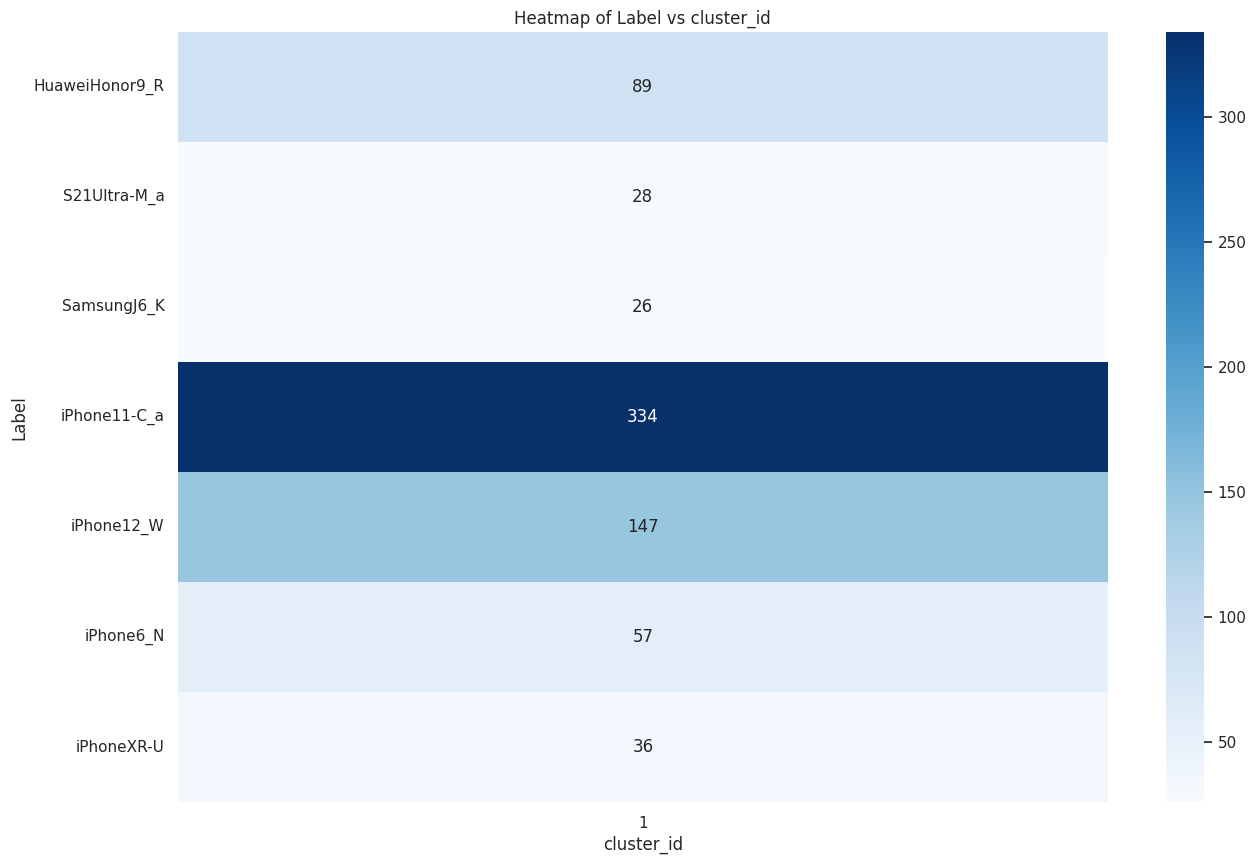






for N=2 cluster_id
1    661
2     56
Name: count, dtype: int64


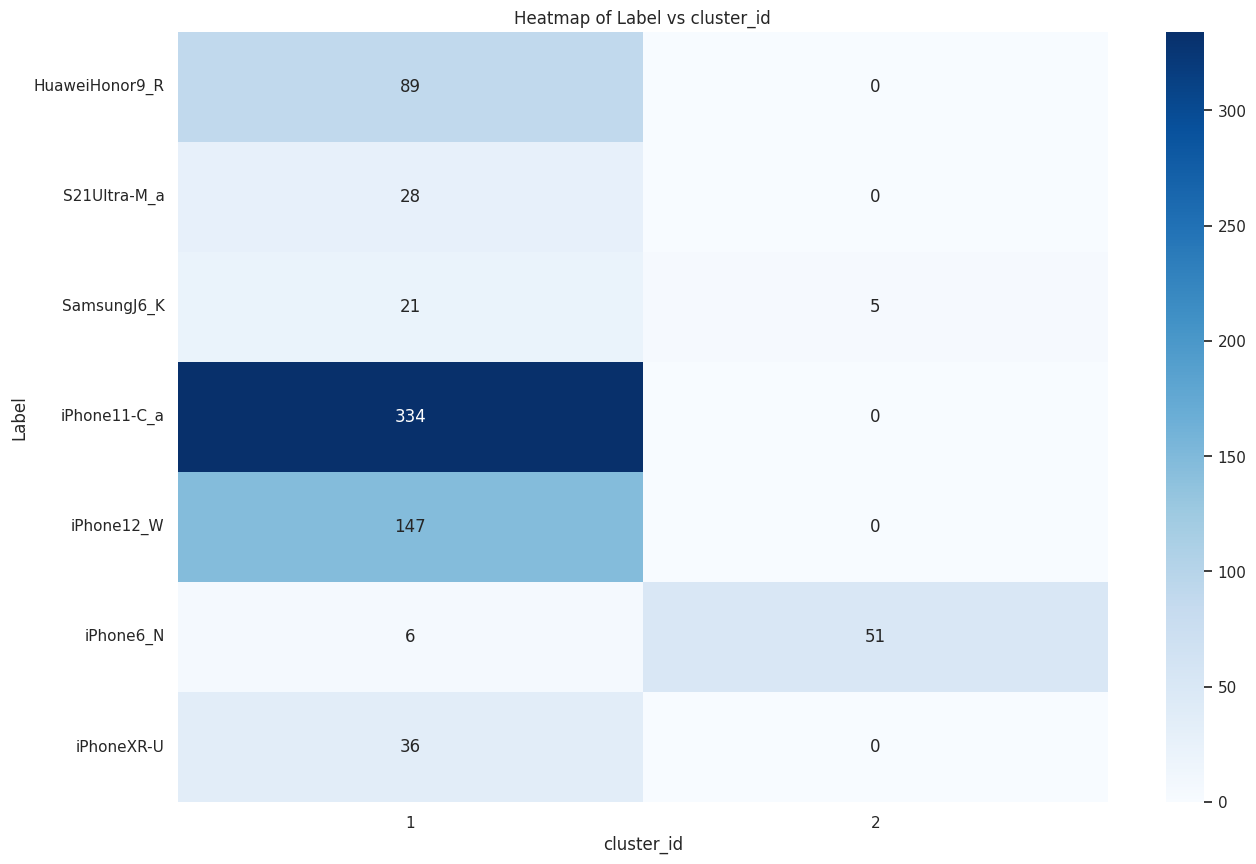






for N=3 cluster_id
1    501
4    135
2     57
3     24
Name: count, dtype: int64


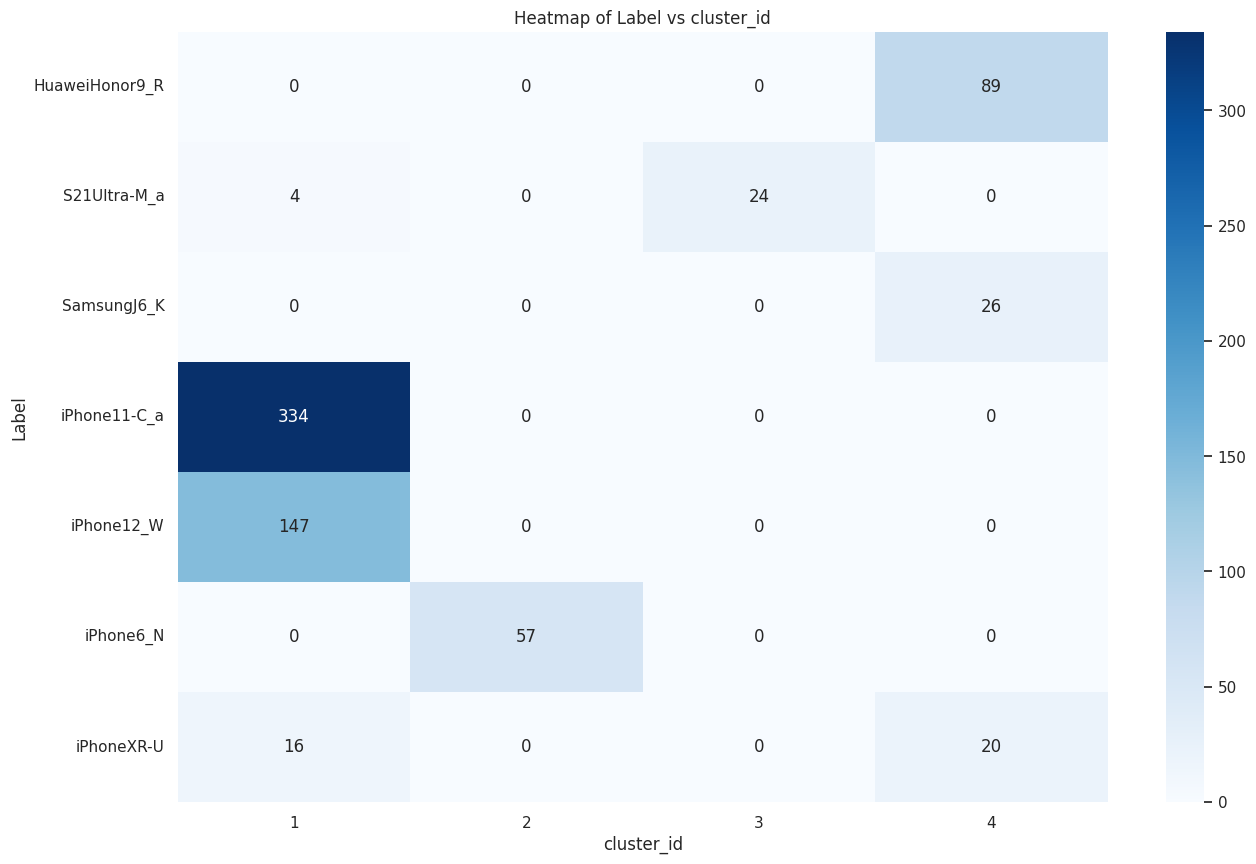






for N=4 cluster_id
1    518
5     89
2     57
3     27
4     26
Name: count, dtype: int64


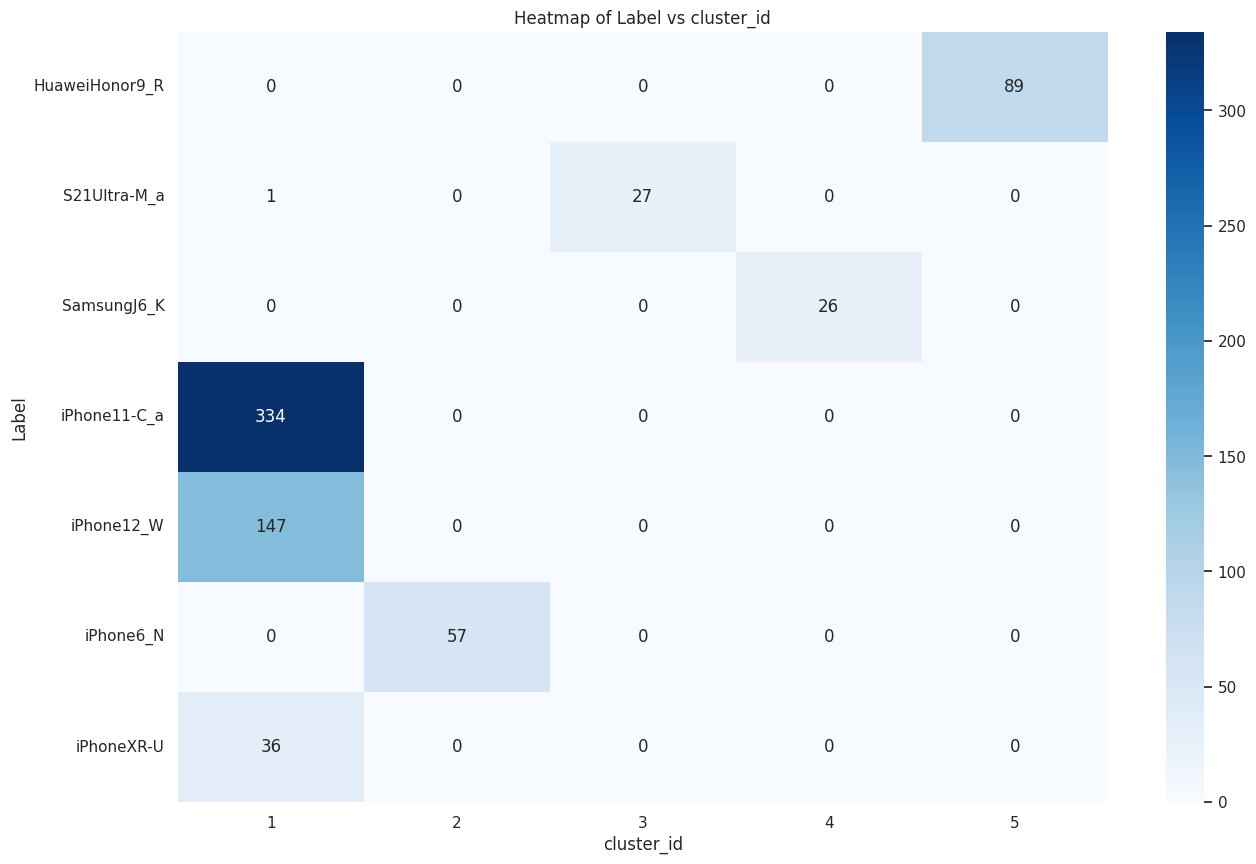






for N=5 cluster_id
1    425
8     89
3     57
2     44
7     36
4     27
5     26
6     13
Name: count, dtype: int64


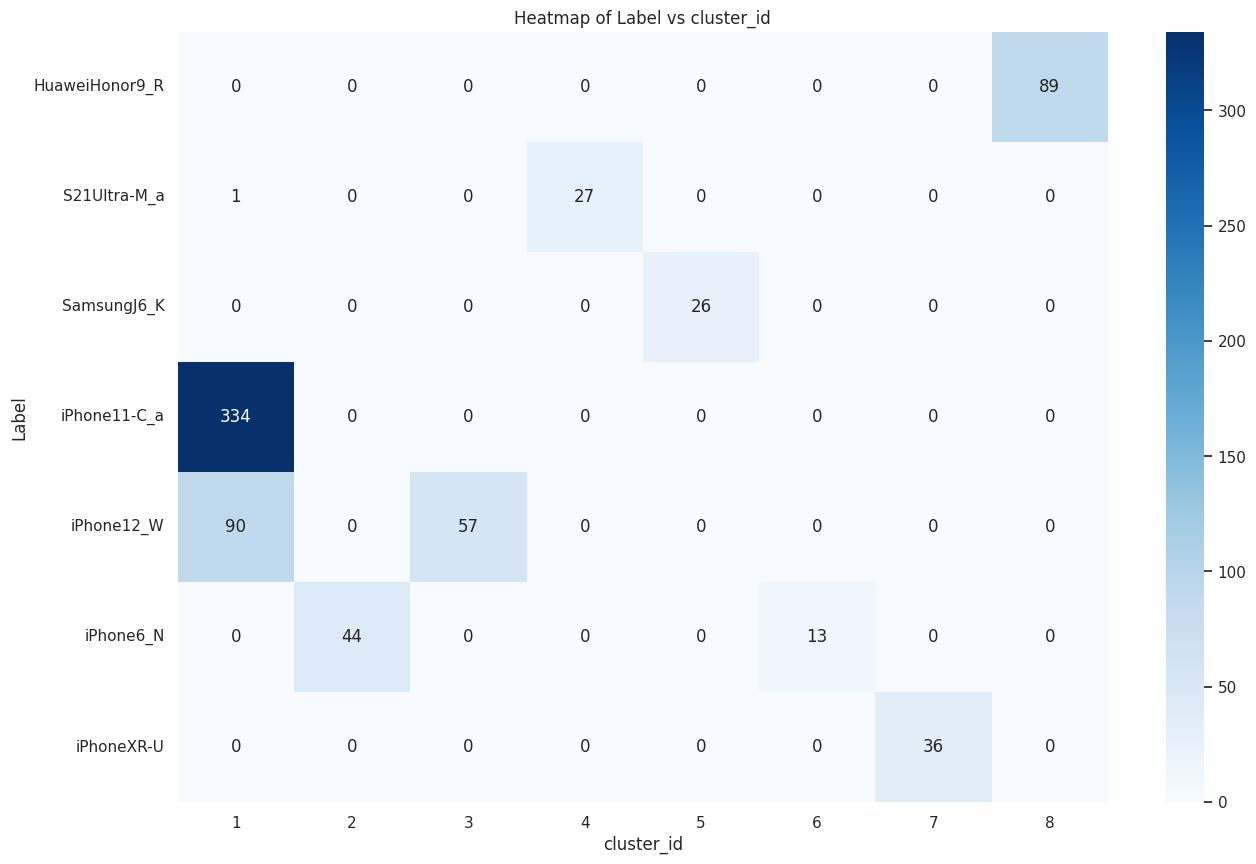






for N=6 cluster_id
2     197
4     144
1     140
13     89
6      26
11     26
5      24
9      20
3      18
7      13
8      12
10      4
12      2
14      1
15      1
Name: count, dtype: int64


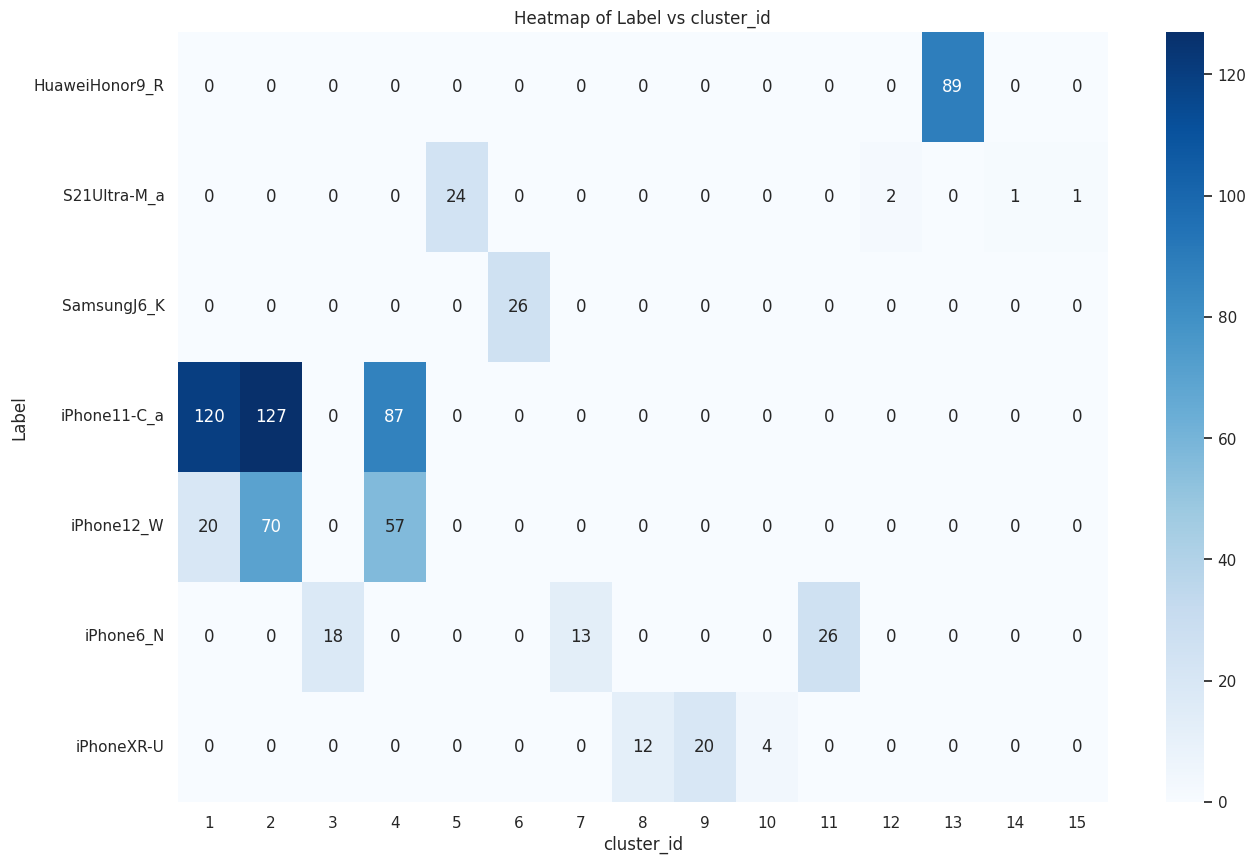






for N=7 cluster_id
34    88
14    50
5     48
2     42
29    24
30    24
10    24
25    21
11    21
15    20
22    20
19    20
16    20
1     20
17    19
18    19
8     19
7     18
6     18
3     18
26    18
27    18
28    17
12    17
9     17
23    17
13    13
20    12
4     12
32     6
21     5
24     4
33     2
31     1
35     1
36     1
37     1
38     1
39     1
Name: count, dtype: int64


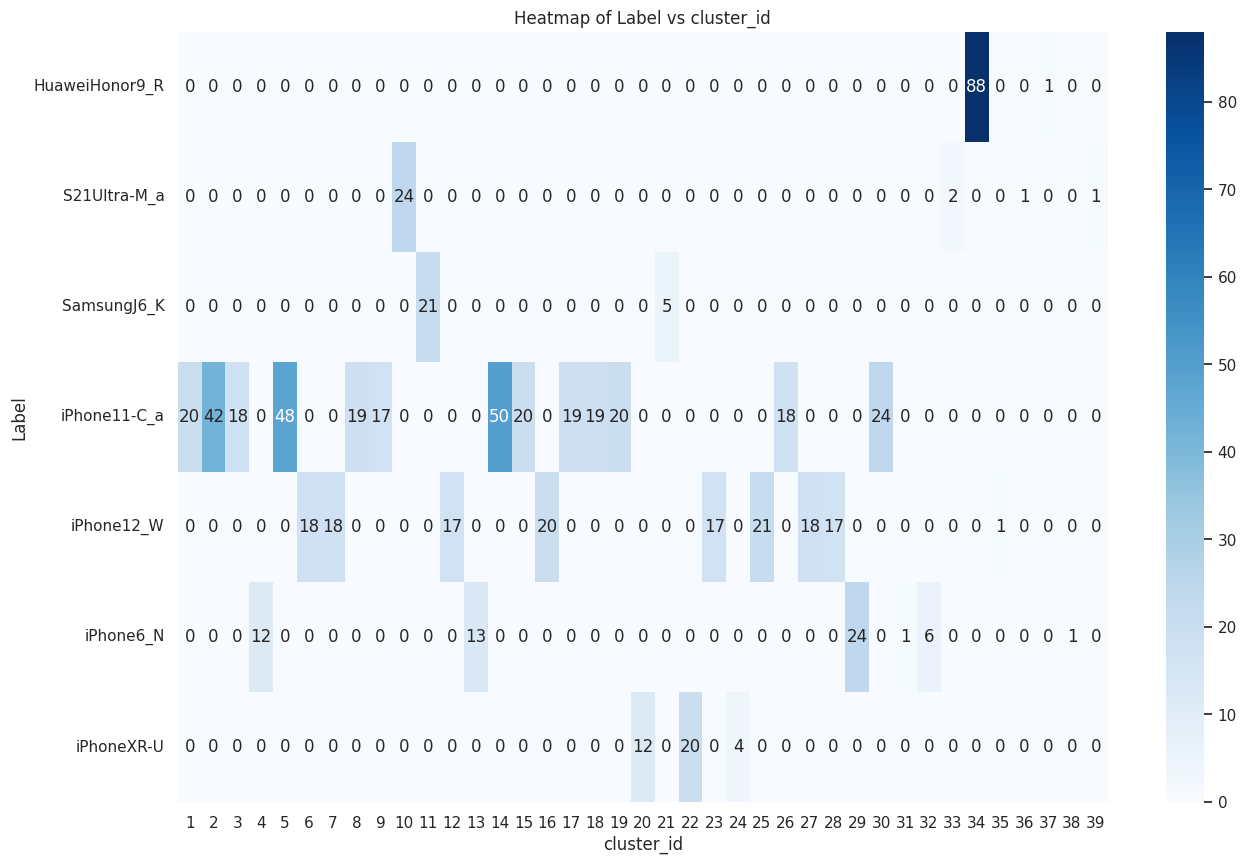






for N=8 cluster_id
1      1
494    1
474    1
475    1
476    1
      ..
242    1
243    1
244    1
245    1
717    1
Name: count, Length: 717, dtype: int64


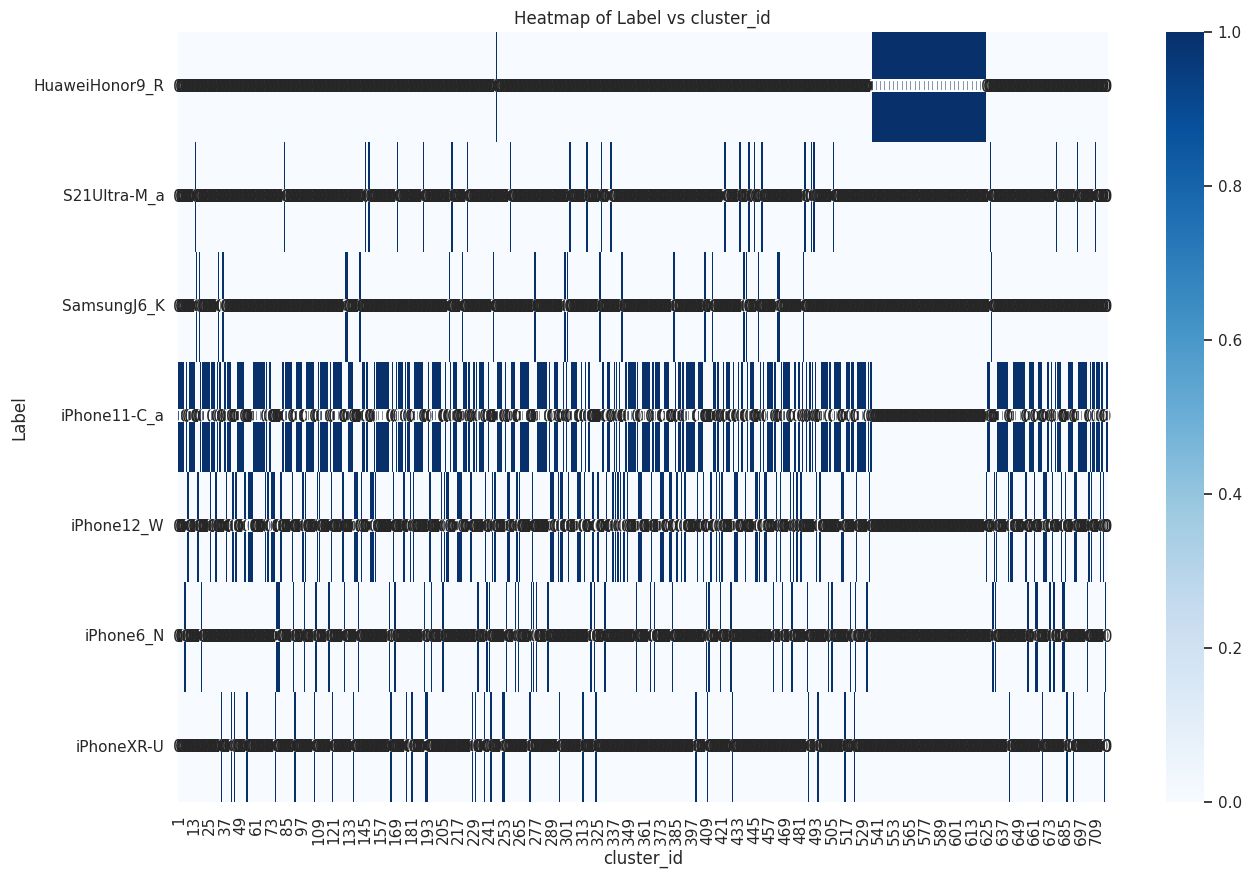






for N=9 cluster_id
1      1
494    1
474    1
475    1
476    1
      ..
242    1
243    1
244    1
245    1
717    1
Name: count, Length: 717, dtype: int64


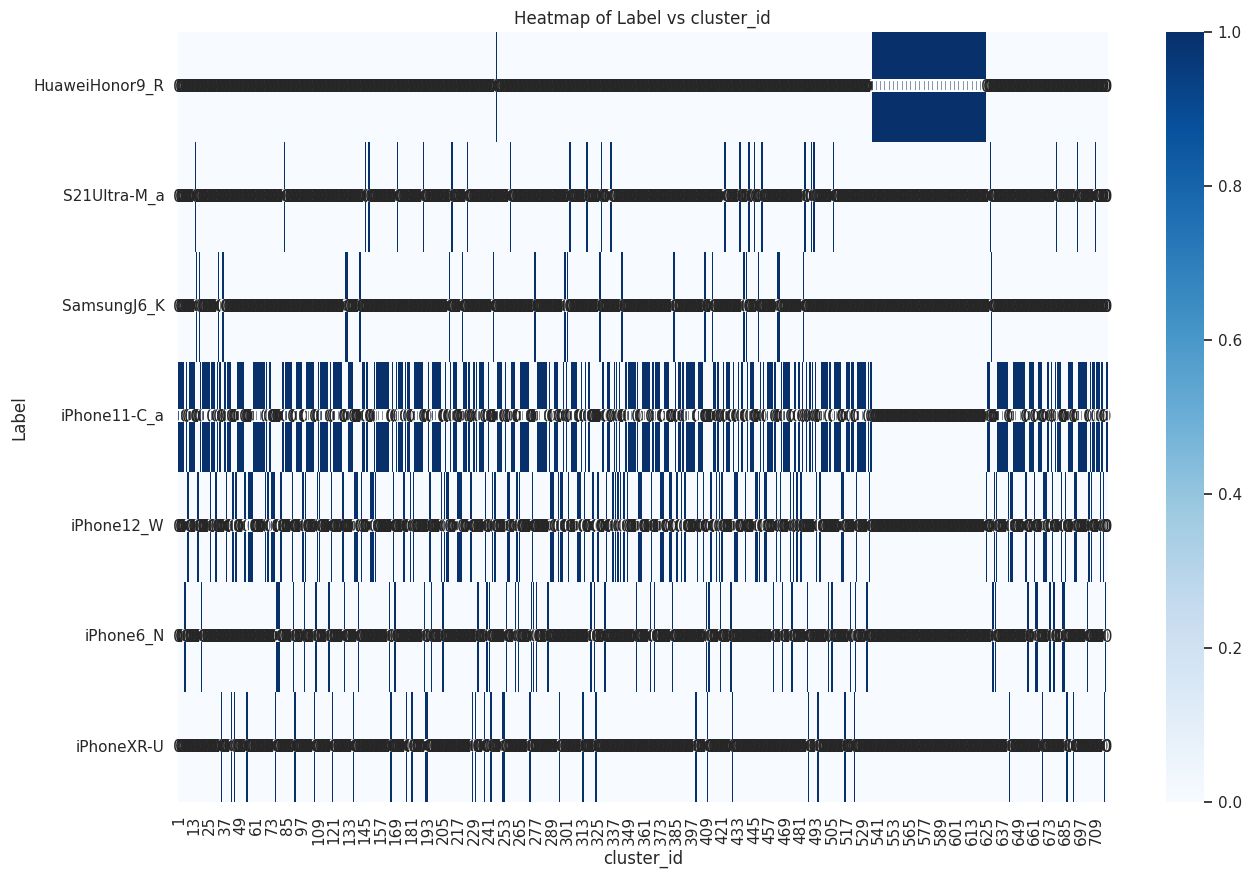

In [ ]:
for number in range(1, len(df.keys())):

  final_df = dictionary_maker()
  for i in range(0,len(df['MAC Address'])):
    final_df = clustering_function(final_df,df.iloc[i], number)

  final_df['Label'] = labels
  print(f'for N={number}',final_df['cluster_id'].value_counts())
  plot_heatmap(final_df,'Label',"cluster_id")
  print('\n\n\n\n')

In [ ]:
# here we feed our data to our model and we will find the best number for N similar features
import numpy as np
from sklearn.metrics import homogeneity_completeness_v_measure


for number in range(1, len(df.keys())):

  final_df = dictionary_maker()
  for i in range(0,len(df['MAC Address'])):
    final_df = clustering_function(final_df,df.iloc[i], number)

  final_df['Label'] = labels
  print(f'for N={number}')
  n_unique_clusterid = len(np.unique(final_df["cluster_id"]))
  n_unique_label = len(np.unique(final_df["Label"]))
  print("Error",n_unique_clusterid-n_unique_label)
  h,c,v = homogeneity_completeness_v_measure(final_df["Label"],final_df["cluster_id"])
  print("Homog: ", h)
  print("Completeness: ", c)
  print("V-Meas: ", v, '\n\n\n')

for N=1
Error -6
Homog:  0.0
Completeness:  1.0
V-Meas:  0.0 



for N=2
Error -5
Homog:  0.14927624519608235
Completeness:  0.8376469522159475
V-Meas:  0.2533951824308689 



for N=3
Error -3
Homog:  0.5391982614735622
Completeness:  0.9425969692138996
V-Meas:  0.6859876945812389 



for N=4
Error -2
Homog:  0.6065062834394788
Completeness:  0.9935916205454891
V-Meas:  0.7532283612557182 



for N=5
Error 1
Homog:  0.7948648732216954
Completeness:  0.8682016786196594
V-Meas:  0.8299162970270715 



for N=6
Error 8
Homog:  0.7440582536324822
Completeness:  0.5703130309805552
V-Meas:  0.645702052111053 



for N=7
Error 32
Homog:  1.0000000000000002
Completeness:  0.4621557956047044
V-Meas:  0.6321567058639882 



for N=8
Error 710
Homog:  1.0000000000000004
Completeness:  0.23393639481006168
V-Meas:  0.3791709131751013 



for N=9
Error 710
Homog:  1.0000000000000004
Completeness:  0.23393639481006168
V-Meas:  0.3791709131751013 





*** Conculosion and selecting the best value for N ***
</br>
based on the stats that we got from our analysis, we select N=4. beacuse if we choose N=5 we will be very specefic and the system is not going to work well with other datas, in other words we will over fit the data.

**Part 2**

In [ ]:
#this part is same as part one, I copy and paste the code
! unzip '/content/MAC_derand_challenge-dataset.zip'


import pandas as pd
import os

base_dir = '/content/challenge-dataset/'

df_list = list()

for root, dirs, files in os.walk(base_dir):
  for file in files:
    if file.endswith(".csv"):
      file_path = os.path.join(root,file)

      df = pd.read_csv(file_path)
      df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

df['Timestamp']=pd.to_datetime(df['Timestamp'], unit='s')

df = df[df['SSID'].isna()]

df.head()

useless_columns = []
non_values = (df.isna().sum())/100
for i in range(0, len(non_values)-1):
  if non_values[i] > 20:
    useless_columns.append(non_values.index[i])
print(useless_columns)

unique_features = df.nunique()
features = []

for i in range(0,len(unique_features)):
  if unique_features.index[i] == 'MAC Address':
    features.append(unique_features.index[i])
  elif unique_features[i] < 20:
    features.append(unique_features.index[i])
print(features)
for i in features:
  if i in useless_columns:
    features.remove(i)
useless_columns.append('Timestamp')
df.drop(useless_columns,inplace = True, axis=1)

['Vendor Specific Tags', 'SSID', 'VHT Capabilities', 'HE Capabilities']
['MAC Address', 'Channel', 'DS Channel', 'HT Capabilities', 'Extended Capabilities', 'Vendor Specific Tags', 'SSID', 'Supported Rates', 'Extended Supported Rates', 'VHT Capabilities', 'Length', 'Label']


In [ ]:
df.head()

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Supported Rates,Extended Supported Rates,Length,Label
0,02:fd:74:4d:50:ab,1,1,631117ffff000000000000000000000000000000000000...,88001400040,02040b16,0c1218243048606c,154,SamsungS7_I
1,02:fd:74:4d:50:ab,1,1,631117ffff000000000000000000000000000000000000...,88001400040,02040b16,0c1218243048606c,154,SamsungS7_I
2,02:fd:74:4d:50:ab,1,2,631117ffff000000000000000000000000000000000000...,88001400040,02040b16,0c1218243048606c,154,SamsungS7_I
3,02:fd:74:4d:50:ab,1,2,631117ffff000000000000000000000000000000000000...,88001400040,02040b16,0c1218243048606c,154,SamsungS7_I
4,02:fd:74:4d:50:ab,1,3,631117ffff000000000000000000000000000000000000...,88001400040,02040b16,0c1218243048606c,154,SamsungS7_I


In [ ]:
from sklearn.preprocessing import LabelEncoder

features_order = ['MAC Address','HT Capabilities','Extended Capabilities','Supported Rates','Extended Supported Rates',
                  'Channel','DS Channel','Length','Label']

def encoder(df,features_order):
  df_tmp = df.copy()
  for elem in features_order:
    if elem != 'Lenght' and elem != 'Channel' and elem != 'DS Channel' and elem != 'Label' and elem != 'MAC Address':
      label_encoder = LabelEncoder()
      df_tmp[elem] = label_encoder.fit_transform(df_tmp[elem].astype(str))
  return df_tmp


df = encoder(df,features_order)


df = df.groupby(['MAC Address'])
df = df.first().reset_index()
display(df)
label_count = df["Label"].value_counts()
print(label_count)

df['cluster_id'] = float('nan')

df_k6 = df

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Supported Rates,Extended Supported Rates,Length,Label
0,02:00:00:00:00:00,1,1,1,2,1,1,1,SamsungM31_A
1,02:02:70:30:b6:43,1,3,2,3,2,0,4,iPhone12_W
2,02:0b:5b:9e:41:54,1,1,3,4,0,0,6,SamsungS7_I
3,02:0b:72:cb:7d:eb,1,1,3,4,0,0,6,SamsungS7_I
4,02:0c:01:7e:50:d6,1,1,3,4,0,0,6,SamsungS7_I
...,...,...,...,...,...,...,...,...,...
1504,fe:c5:50:16:eb:8c,11,11,2,3,2,0,2,iPhone12_W
1505,fe:ed:a5:45:e8:b9,11,11,4,1,0,0,4,XiaomiRedmiNote9S_T
1506,fe:f5:97:dd:58:86,6,8,2,3,2,0,4,iPhone12_W
1507,fe:f9:ac:47:0d:b7,11,11,2,3,2,0,2,iPhone12_W


Label
iPhone12_W             1206
XiaomiRedmiNote9S_T     138
HuaweiHonor9_R           89
SamsungS7_I              38
GooglePixel3A_V          23
SamsungM31_A             15
Name: count, dtype: int64


In [ ]:
def dictionary_maker():

  features_dictionaries = {
      'MAC Address' : []
      ,'Channel' : []
      ,'DS Channel' : []
      ,'HT Capabilities' : []
      ,'Extended Capabilities' : []
      ,'Supported Rates' : []
      ,'Extended Supported Rates' : []
      ,'Length' : []
      ,'cluster_id' : []
  }
  final_df = pd.DataFrame(features_dictionaries)
  return final_df

In [ ]:
#this part split the data into k different devices and store them in 5 seperate folder
import random

for j in range (2,6):
  # Number of new data frames to create
  num_new_dfs = 5

  # Create a folder to store CSV files
  folder_name = f'DataFrames_k={j}'
  os.makedirs(folder_name, exist_ok=True)

  # Create new data frames
  for i in range(num_new_dfs):
      # Randomly select two devices
      selected_devices = random.sample(df['Label'].unique().tolist(), j)
      # Filter original DataFrame based on selected devices
      new_df = df[df['Label'].isin(selected_devices)].copy()
      # Save to CSV in the specified folder
      file_path = os.path.join(folder_name, f'new_dataframe_{i+1}.csv')
      new_df.to_csv(file_path, index=False)

In [ ]:
import numpy as np
from sklearn.metrics import homogeneity_completeness_v_measure
avg_list_homogeneity = []
avg_list_completeness = []
avg_list_v_measure = []
avg_list_error = []

for k in range(2,6):
  folder_path = f'/content/DataFrames_k={k}'
  list_homogeneity = []
  list_completeness = []
  list_v_measure = []
  list_error = []

  for file_name in os.listdir(folder_path):
      if file_name.endswith('.csv'):

          # Construct the full file path
          file_path = os.path.join(folder_path, file_name)
          # Read the CSV file into a DataFrame and append to the list
          df = pd.read_csv(file_path)
          labels = df["Label"]
          df.drop('Label',axis=1, inplace = True)

          final_df = dictionary_maker()
          for i in range(0,len(df['MAC Address'])):
            final_df = clustering_function(final_df,df.iloc[i], 4)

          final_df['Label'] = labels
          n_unique_clusterid = len(np.unique(final_df["cluster_id"]))
          n_unique_label = len(np.unique(final_df["Label"]))
          error = float(n_unique_clusterid-n_unique_label)
          print("Error",error)
          h,c,v = homogeneity_completeness_v_measure(final_df["Label"],final_df["cluster_id"])
          list_error.append(error)
          list_homogeneity.append(h)
          list_completeness.append(c)
          list_v_measure.append(v)
          print("Homog: ", h)
          print("Completeness: ", c)
          print("V-Meas: ", v, '\n\n\n')


  avg_error=(sum(list_error) / len(list_error))
  avg_homogeneity=(sum(list_homogeneity) / len(list_homogeneity))
  avg_completeness=(sum(list_completeness) / len(list_completeness))
  avg_v_measure=(sum(list_v_measure) / len(list_v_measure))

  avg_list_error.append(avg_error)
  avg_list_homogeneity.append(avg_homogeneity)
  avg_list_completeness.append(avg_completeness)
  avg_list_v_measure.append(avg_v_measure)
  print(f'####### Average of homogeneity & completeness & v_measure for K={k}#######\n')
  print(" Avg of Homog: ", avg_homogeneity)
  print(" Avg of Completeness: ", avg_completeness)
  print(" Avg of V-Meas: ",avg_v_measure , '\n\n\n')

Error 0.0
Homog:  1.0
Completeness:  1.0
V-Meas:  1.0 



Error 0.0
Homog:  1.0
Completeness:  1.0
V-Meas:  1.0 



Error 1.0
Homog:  1.0000000000000002
Completeness:  0.8670220325513139
V-Meas:  0.9287753625130126 



Error 1.0
Homog:  1.0000000000000004
Completeness:  0.4184065578093865
V-Meas:  0.5899670380198769 



Error 1.0
Homog:  1.0000000000000002
Completeness:  0.5737365624405024
V-Meas:  0.7291392678209997 



####### Average of homogeneity & completeness & v_measure for K=2#######

 Avg of Homog:  1.0
 Avg of Completeness:  0.7718330305602406
 Avg of V-Meas:  0.8495763336707778 



Error 1.0
Homog:  1.0000000000000002
Completeness:  0.6791211201753453
V-Meas:  0.8089006945543356 



Error 1.0
Homog:  1.0
Completeness:  0.7532606373819525
V-Meas:  0.8592682928269638 



Error 1.0
Homog:  1.0
Completeness:  0.8916768991102044
V-Meas:  0.9427369965025486 



Error 1.0
Homog:  1.0
Completeness:  0.632305955417142
V-Meas:  0.7747395067924675 



Error 0.0
Homog:  1.0
Completenes

In [ ]:
final_df = dictionary_maker()
labels = df_k6["Label"]
df_k6.drop('Label',axis=1, inplace = True)
for i in range(0,len(df_k6['MAC Address'])):
  final_df = clustering_function(final_df,df_k6.iloc[i], 4)

final_df['Label'] = labels
n_unique_clusterid = len(np.unique(final_df["cluster_id"]))
n_unique_label = len(np.unique(final_df["Label"]))
print("Error",n_unique_clusterid-n_unique_label)
h,c,v = homogeneity_completeness_v_measure(final_df["Label"],final_df["cluster_id"])
print("Homog: ", h)
print("Completeness: ", c)
print("V-Meas: ", v, '\n\n\n')
avg_list_error.append(sum(list_error) / len(list_error))
avg_list_homogeneity.append(sum(list_homogeneity) / len(list_homogeneity))
avg_list_completeness.append(sum(list_completeness) / len(list_completeness))
avg_list_v_measure.append(sum(list_v_measure) / len(list_v_measure))

Error 0
Homog:  0.933056389895998
Completeness:  0.9405960909168901
V-Meas:  0.9368110702796286 





In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

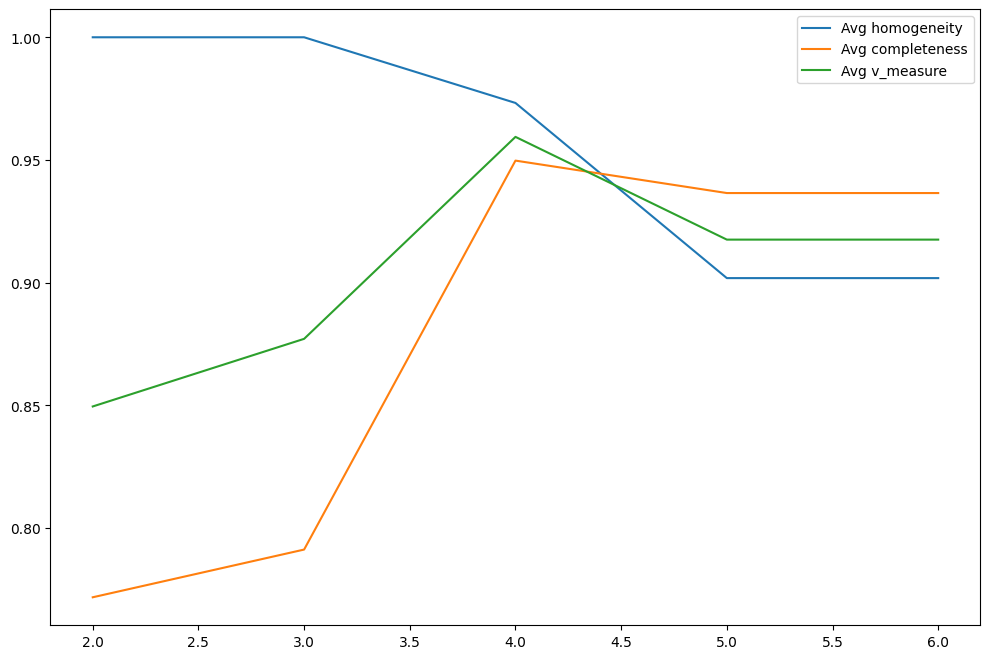

In [ ]:
plt.figure(figsize=(12,8))

k = list(range(2,7))
sns.lineplot(x=k ,y=avg_list_homogeneity, label='Avg homogeneity')
sns.lineplot(x=k ,y=avg_list_completeness, label='Avg completeness')
sns.lineplot(x=k ,y=avg_list_v_measure, label='Avg v_measure')

<Axes: >

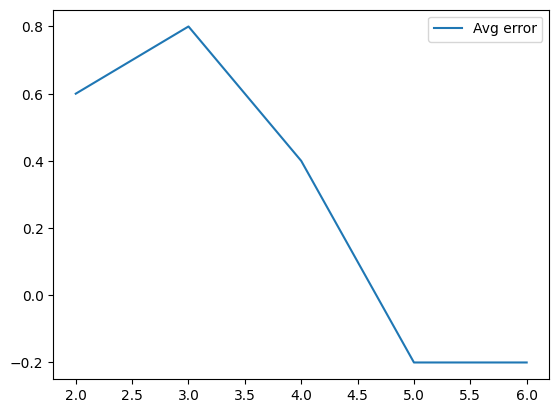

In [ ]:
sns.lineplot(x=k ,y=avg_list_error, label='Avg error')

**conculosion:** <br>
we can see we made a good decision and we get over 0.9 for k=2, it means that our system is pretty good for 2 randam data sets. on the other hand we can see as our number of devices going up, our model works better.<br>
our model works best if we have 4 devices in the room, because in these range we have the highest v_measured and lowest error.<br>
with 5 and 6 devices it works very well but the accuracy goes down. so I think if we add more devices we get lower accuracy. we can improve it by testing different k for these datasets in order to get a model that works well with high number devices.<br>

**Part 3**

In [ ]:
def prepare(df):
  df['Timestamp']=pd.to_datetime(df['Timestamp'], unit='s')

  df = df[df['SSID'].isna()]

  useless_columns = []
  non_values = (df.isna().sum())/100
  for i in range(0, len(non_values)-1):
    if non_values[i] > 20:
      useless_columns.append(non_values.index[i])
  print(useless_columns)

  unique_features = df.nunique()
  features = []

  for i in range(0,len(unique_features)):
    if unique_features.index[i] == 'MAC Address':
      features.append(unique_features.index[i])
    elif unique_features[i] < 20:
      features.append(unique_features.index[i])
  print(features)
  for i in features:
    if i in useless_columns:
      features.remove(i)
  useless_columns.append('Timestamp')
  df.drop(useless_columns,inplace = True, axis=1)

  return df

In [ ]:
df = pd.read_csv('/content/MAC_derand_unlabelled-challenge.csv')

In [ ]:
df = prepare(df)

['Vendor Specific Tags', 'SSID', 'VHT Capabilities', 'HE Capabilities']
['MAC Address', 'Channel', 'DS Channel', 'HT Capabilities', 'Extended Capabilities', 'Vendor Specific Tags', 'SSID', 'Supported Rates', 'Extended Supported Rates', 'VHT Capabilities', 'Length']


<ipython-input-89-a760e83cb3c2>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(useless_columns,inplace = True, axis=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

features_order = ['MAC Address','HT Capabilities','Extended Capabilities','Supported Rates','Extended Supported Rates',
                  'Channel','DS Channel','Length']

df = encoder(df,features_order)


df = df.groupby(['MAC Address'])
df = df.first().reset_index()


df['cluster_id'] = float('nan')

display(df)

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Supported Rates,Extended Supported Rates,Length,cluster_id
0,02:02:70:30:b6:43,1,3.0,2,1,2,0,4,NaN
1,02:0b:5b:9e:41:54,1,2.0,4,2,0,0,6,NaN
2,02:0b:72:cb:7d:eb,11,9.0,4,2,0,0,6,NaN
3,02:0c:01:7e:50:d6,11,13.0,4,2,0,0,6,NaN
4,02:11:33:61:b5:ef,1,2.0,2,1,2,0,4,NaN
...,...,...,...,...,...,...,...,...,...
1496,fe:c5:50:16:eb:8c,11,11.0,2,1,2,0,2,NaN
1497,fe:ed:a5:45:e8:b9,11,11.0,5,5,0,0,4,NaN
1498,fe:f5:97:dd:58:86,6,8.0,2,1,2,0,4,NaN
1499,fe:f9:ac:47:0d:b7,11,11.0,2,1,2,0,2,NaN


In [ ]:
def dictionary_maker():

  features_dictionaries = {
      'MAC Address' : []
      ,'Channel' : []
      ,'DS Channel' : []
      ,'HT Capabilities' : []
      ,'Extended Capabilities' : []
      ,'Supported Rates' : []
      ,'Extended Supported Rates' : []
      ,'Length' : []
      ,'cluster_id' : []
  }
  final_df = pd.DataFrame(features_dictionaries)
  return final_df

In [ ]:
final_df = dictionary_maker()
for i in range(0,len(df['MAC Address'])):
  final_df = clustering_function(final_df,df.iloc[i], 4)

In [ ]:
final_df['cluster_id'].value_counts()

cluster_id
1     1032
3      192
6       94
7       44
10      39
5       37
2       35
8       14
9        9
4        3
11       1
12       1
Name: count, dtype: int64

**number of devices:**
<br>**So as we can see that we have 12 different devices in this dataset**